In [1]:
import os 
import cv2
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Cover image location
cover_grey_dir = "C:/Users/PC/Masters Files/SteganographyDetection/Datasets/Dataset Cover Images Greyscale"
# LSB Greyscale
lsbg_dir = "C:/Users/PC/Masters Files/SteganographyDetection/Datasets/Dataset LSB Greyscale"

In [3]:
# Combine cover image data into a single array
cover_data = []
for i, filename in enumerate(os.listdir(cover_grey_dir)):
    cover_image = cv2.imread(cover_grey_dir + "/" + filename, cv2.IMREAD_UNCHANGED)
    cover_data.append([cover_image])
# The length of the array should be 60
print(len(cover_data))

60


In [4]:
# Combine stego image data into a single array
stego_data = []
for i, filename in enumerate(os.listdir(lsbg_dir)):
    stego_image = cv2.imread(lsbg_dir + "/" + filename, cv2.IMREAD_UNCHANGED)
    stego_data.append([stego_image])
# The length of the array should be 60
print(len(stego_data))

60


In [5]:
# Combine cover and stego images with corresponding labels 
labeled_data = []
for instance in cover_data:
    labeled_data.append([instance, 0])
for instance in stego_data:
    labeled_data.append([instance, 1])
# The length of the array should be 120
len(labeled_data)

120

Text(0.5, 1.0, '0')

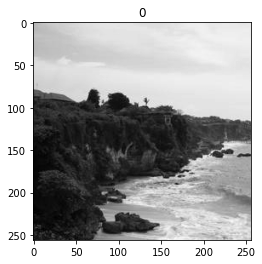

In [6]:
plt.imshow(np.array(labeled_data[1][0]).reshape(256,256,1), cmap="gray")
plt.title(labeled_data[0][1])

In [7]:
# Separate labels from data
X = []
Y = []
for img, label in labeled_data:
    X.append(img)
    Y.append(label)

In [8]:
print(len(X))
print(len(Y))

120
120


In [9]:
# Training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [10]:
# Split training set to obtain validation set
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=2)

In [11]:
# Get dataset lengths
x_train_len = len(x_train)
y_train_len = len(y_train)
x_test_len = len(x_test)
y_test_len = len(y_test)
x_valid_len = len(x_valid)
y_valid_len = len(y_valid)

In [12]:
print("Training set length: " + str(x_train_len) + ", and label set is: " + str(y_train_len))
print("Testing set length: " + str(x_test_len)+ ", and label set is: " + str(y_test_len))
print("Validation set length: " + str(x_valid_len)+ ", and label set is: " + str(y_valid_len))

Training set length: 72, and label set is: 72
Testing set length: 24, and label set is: 24
Validation set length: 24, and label set is: 24


In [13]:
# Change data types
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)

In [14]:
# Normalise data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_valid = x_valid / 255.0

In [15]:
x_train.shape

(72, 1, 256, 256)

In [16]:
# Display image data format
x_test

array([[[[0.81568627, 0.82745098, 0.83137255, ..., 0.88627451,
          0.88235294, 0.88235294],
         [0.81960784, 0.82352941, 0.83137255, ..., 0.88627451,
          0.87843137, 0.87843137],
         [0.81960784, 0.82352941, 0.81960784, ..., 0.88627451,
          0.89019608, 0.89019608],
         ...,
         [0.1372549 , 0.14117647, 0.14117647, ..., 0.34509804,
          0.31372549, 0.30588235],
         [0.14901961, 0.15294118, 0.15686275, ..., 0.34117647,
          0.34117647, 0.30196078],
         [0.14117647, 0.14117647, 0.1372549 , ..., 0.23921569,
          0.24313725, 0.23529412]]],


       [[[0.43921569, 0.25882353, 0.16078431, ..., 0.18431373,
          0.20392157, 0.17647059],
         [0.38823529, 0.24705882, 0.4745098 , ..., 0.12156863,
          0.16862745, 0.14117647],
         [0.39215686, 0.40784314, 0.5372549 , ..., 0.12156863,
          0.09411765, 0.0627451 ],
         ...,
         [0.14117647, 0.17254902, 0.30196078, ..., 0.24705882,
          0.28235294, 0

In [17]:
# Display labels
y_test

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1])

<AxesSubplot:ylabel='count'>

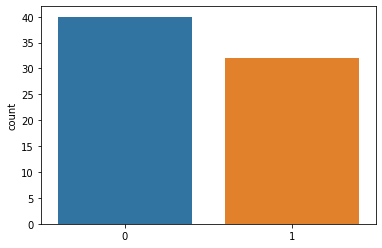

In [18]:
# Display class distribution in training set, where 0 is cover and 1 is stego
sns.countplot(x = y_train)

In [19]:
# Reshape images to specify a single dimension of greyscale images
x_train = x_train.reshape(x_train_len, 256, 256, 1)
x_test = x_test.reshape(x_test_len, 256, 256, 1)
x_valid = x_valid.reshape(x_valid_len, 256, 256, 1)

In [20]:
# Start timer
start = datetime.datetime.now()

In [21]:
# Model structure
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(layers.Flatten())
model.add(Dense(128, activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       7

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_valid, y_valid))

Epoch 1/15
3/3 [==============================] - 14s 4s/step - loss: 1.8138 - accuracy: 0.5278 - val_loss: 0.7629 - val_accuracy: 0.4583
Epoch 2/15
3/3 [==============================] - 15s 5s/step - loss: 0.9539 - accuracy: 0.5417 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 3/15
3/3 [==============================] - 15s 5s/step - loss: 0.6971 - accuracy: 0.5556 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 4/15
3/3 [==============================] - 13s 4s/step - loss: 0.6901 - accuracy: 0.5556 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 5/15
3/3 [==============================] - 13s 4s/step - loss: 0.6908 - accuracy: 0.5556 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 6/15
3/3 [==============================] - 17s 5s/step - loss: 0.6913 - accuracy: 0.5556 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 7/15
3/3 [==============================] - 16s 5s/step - loss: 0.6912 - accuracy: 0.5556 - val_loss: 0.6961 - val_accuracy: 0.5000
Epoch 8/15
3/3 [==================

In [24]:
# End timer
end = datetime.datetime.now()

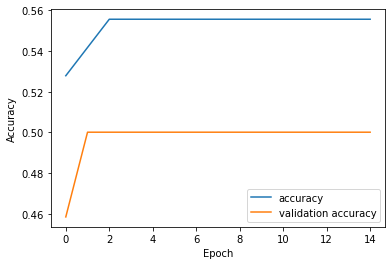

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

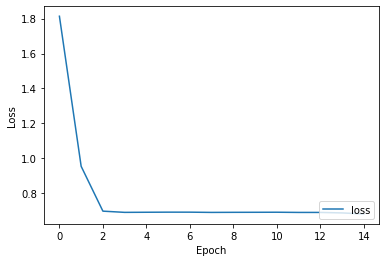

In [26]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [27]:
# Evaluate trained model accuracy on previously unseen data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

1/1 - 1s - loss: 0.7207 - accuracy: 0.3333


In [28]:
# Evaluate model training time performance
duration=end-start
print ("Model training time: ", duration)

Model training time:  0:03:35.175592
